# Output variable -> y
y -> Whether the client has subscribed a term deposit or not 
Binomial ("yes" or "no")


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression 

In [2]:
bankdf  = pd.read_csv("bank_data.csv")

bankdf.head(10)

,age,default,balance,housing,loan,duration,campaign,pdays,previous,poutfailure,...,johousemaid,jomanagement,joretired,joself.employed,joservices,jostudent,jotechnician,jounemployed,jounknown,y
0,58,0,2143,1,0,261,1,-1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,44,0,29,1,0,151,1,-1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,76,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,47,0,1506,1,0,92,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,33,0,1,0,0,198,1,-1,0,0,...,0,0,0,0,0,0,0,0,1,0
5,35,0,231,1,0,139,1,-1,0,0,...,0,1,0,0,0,0,0,0,0,0
6,28,0,447,1,1,217,1,-1,0,0,...,0,1,0,0,0,0,0,0,0,0
7,42,1,2,1,0,380,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,58,0,121,1,0,50,1,-1,0,0,...,0,0,1,0,0,0,0,0,0,0
9,43,0,593,1,0,55,1,-1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [3]:
bankdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              45211 non-null  int64
 1   default          45211 non-null  int64
 2   balance          45211 non-null  int64
 3   housing          45211 non-null  int64
 4   loan             45211 non-null  int64
 5   duration         45211 non-null  int64
 6   campaign         45211 non-null  int64
 7   pdays            45211 non-null  int64
 8   previous         45211 non-null  int64
 9   poutfailure      45211 non-null  int64
 10  poutother        45211 non-null  int64
 11  poutsuccess      45211 non-null  int64
 12  poutunknown      45211 non-null  int64
 13  con_cellular     45211 non-null  int64
 14  con_telephone    45211 non-null  int64
 15  con_unknown      45211 non-null  int64
 16  divorced         45211 non-null  int64
 17  married          45211 non-null  int64
 18  single

In [4]:
bankdf.isna().sum()

age                0
default            0
balance            0
housing            0
loan               0
duration           0
campaign           0
pdays              0
previous           0
poutfailure        0
poutother          0
poutsuccess        0
poutunknown        0
con_cellular       0
con_telephone      0
con_unknown        0
divorced           0
married            0
single             0
joadmin.           0
joblue.collar      0
joentrepreneur     0
johousemaid        0
jomanagement       0
joretired          0
joself.employed    0
joservices         0
jostudent          0
jotechnician       0
jounemployed       0
jounknown          0
y                  0
dtype: int64

In [5]:
bankdf.shape

(45211, 32)

In [6]:
bankdf.head(10)

,age,default,balance,housing,loan,duration,campaign,pdays,previous,poutfailure,...,johousemaid,jomanagement,joretired,joself.employed,joservices,jostudent,jotechnician,jounemployed,jounknown,y
0,58,0,2143,1,0,261,1,-1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,44,0,29,1,0,151,1,-1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,76,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,47,0,1506,1,0,92,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,33,0,1,0,0,198,1,-1,0,0,...,0,0,0,0,0,0,0,0,1,0
5,35,0,231,1,0,139,1,-1,0,0,...,0,1,0,0,0,0,0,0,0,0
6,28,0,447,1,1,217,1,-1,0,0,...,0,1,0,0,0,0,0,0,0,0
7,42,1,2,1,0,380,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,58,0,121,1,0,50,1,-1,0,0,...,0,0,1,0,0,0,0,0,0,0
9,43,0,593,1,0,55,1,-1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [7]:
bankdf['default'].value_counts()

0    44396
1      815
Name: default, dtype: int64

In [8]:
bankdf[bankdf['default']==1].head(20)

,age,default,balance,housing,loan,duration,campaign,pdays,previous,poutfailure,...,johousemaid,jomanagement,joretired,joself.employed,joservices,jostudent,jotechnician,jounemployed,jounknown,y
7,42,1,2,1,0,380,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
79,55,1,1,1,0,208,1,-1,0,0,...,0,0,0,0,1,0,0,0,0,0
338,51,1,-2,0,0,402,3,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
419,33,1,72,1,0,623,1,-1,0,0,...,0,0,0,0,0,0,1,0,0,0
458,33,1,-60,0,0,243,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
508,60,1,15,0,0,80,1,-1,0,0,...,0,0,1,0,0,0,0,0,0,0
562,35,1,204,1,0,424,2,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
572,41,1,-137,1,1,189,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
596,54,1,0,1,0,138,3,-1,0,0,...,0,0,0,0,1,0,0,0,0,0
636,52,1,-183,1,0,145,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

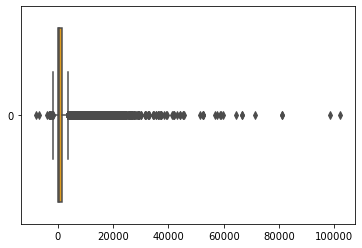

In [9]:
sns.boxplot(data=bankdf['balance'],color='orange',orient='h')

In [10]:
bankdf[(bankdf['balance']<0) & (bankdf['default']==1)]

,age,default,balance,housing,loan,duration,campaign,pdays,previous,poutfailure,...,johousemaid,jomanagement,joretired,joself.employed,joservices,jostudent,jotechnician,jounemployed,jounknown,y
338,51,1,-2,0,0,402,3,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
458,33,1,-60,0,0,243,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
572,41,1,-137,1,1,189,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
636,52,1,-183,1,0,145,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
838,35,1,-532,1,0,149,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38876,26,1,-130,1,0,216,1,-1,0,0,...,0,1,0,0,0,0,0,0,0,0
38985,38,1,-38,1,0,119,4,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
39347,24,1,-1414,1,1,171,2,-1,0,0,...,0,0,0,0,1,0,0,0,0,0
39674,58,1,-235,0,1,93,2,-1,0,0,...,0,0,1,0,0,0,0,0,0,0


<AxesSubplot:xlabel='age', ylabel='balance'>

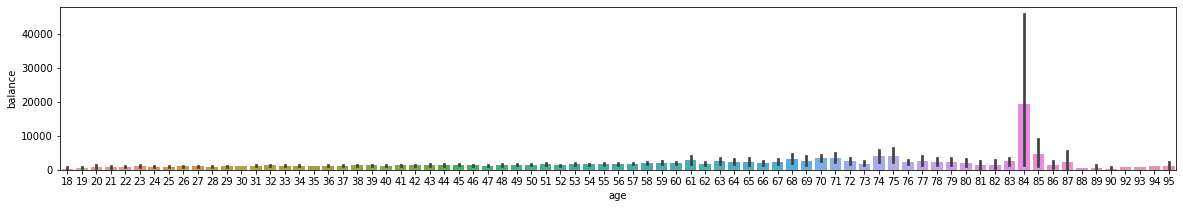

In [11]:
plt.rcParams["figure.figsize"] = (20,3)
sns.barplot(x='age',y='balance',data=bankdf)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

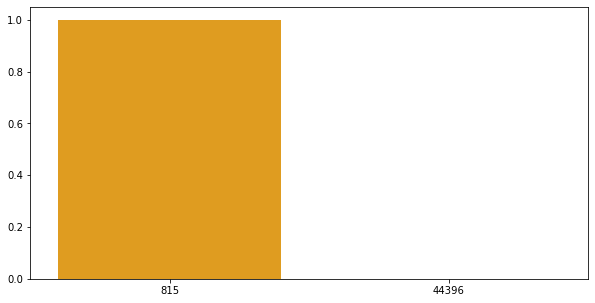

In [12]:
plt.rcParams["figure.figsize"] = (10,5)
sns.barplot(bankdf['default'].value_counts().values, 
            bankdf['default'].value_counts().index, data=bankdf,color='orange')


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

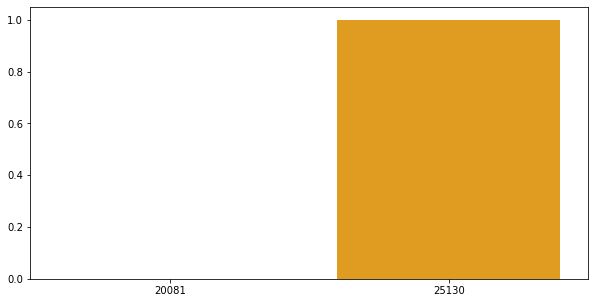

In [13]:
plt.rcParams["figure.figsize"] = (10,5)
sns.barplot(bankdf['housing'].value_counts().values, bankdf['housing'].value_counts().index, data=bankdf,color='orange')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

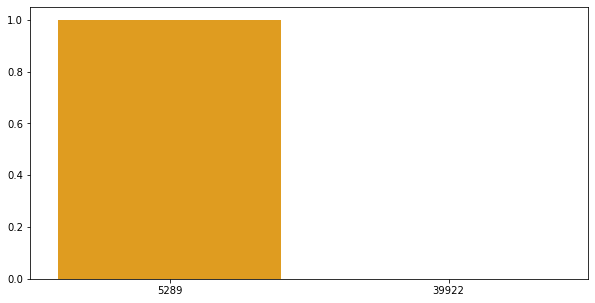

In [14]:
plt.rcParams["figure.figsize"] = (10,5)
sns.barplot(bankdf['y'].value_counts().values, bankdf['y'].value_counts().index, data=bankdf,color='orange')

In [15]:
bankdf['pdays'].value_counts()

-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: pdays, Length: 559, dtype: int64

In [16]:
bankdf['housing'].value_counts()

1    25130
0    20081
Name: housing, dtype: int64

In [17]:
X =  bankdf.drop('y',axis=1)
X


,age,default,balance,housing,loan,duration,campaign,pdays,previous,poutfailure,...,joentrepreneur,johousemaid,jomanagement,joretired,joself.employed,joservices,jostudent,jotechnician,jounemployed,jounknown
0,58,0,2143,1,0,261,1,-1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,44,0,29,1,0,151,1,-1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,33,0,2,1,1,76,1,-1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,47,0,1506,1,0,92,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,33,0,1,0,0,198,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,977,3,-1,0,0,...,0,0,0,0,0,0,0,1,0,0
45207,71,0,1729,0,0,456,2,-1,0,0,...,0,0,0,1,0,0,0,0,0,0
45208,72,0,5715,0,0,1127,5,184,3,0,...,0,0,0,1,0,0,0,0,0,0
45209,57,0,668,0,0,508,4,-1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
Y = bankdf['y']

In [19]:
Y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: y, dtype: int64

In [20]:
Y.tail(10)

45201    1
45202    1
45203    1
45204    1
45205    1
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, dtype: int64

In [21]:
classifier  = LogisticRegression(max_iter=3000)

In [22]:
classifier.fit(X,Y)

LogisticRegression(max_iter=3000)

In [23]:
#Predict for X dataset
y_pred = classifier.predict(X)

In [24]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted_prob': classifier.predict(X)})

In [25]:
y_pred_df

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


In [26]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[39008   914]
 [ 3596  1693]]


In [27]:
print('Total correct predictions % :')
((39279+851)/(39279+643+4438+851))*100

Total correct predictions % :


88.76158457012674

In [28]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     39922
           1       0.65      0.32      0.43      5289

    accuracy                           0.90     45211
   macro avg       0.78      0.65      0.69     45211
weighted avg       0.88      0.90      0.88     45211



In [29]:
# ROC Curve

Text(0, 0.5, 'True Positive Rate')

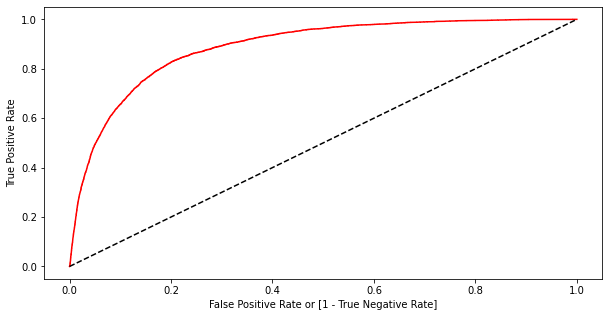

In [30]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')


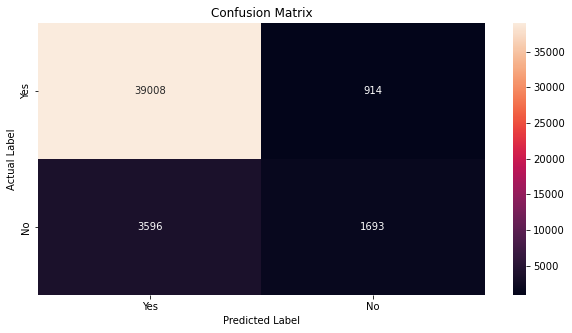

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
target_label =['Yes','No']
df_confusion_matrix = pd.DataFrame(confusion_matrix,index=target_label,columns=target_label)
sns.heatmap(df_confusion_matrix,annot=True,fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()